In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tauSample = pd.read_csv('training.csv.zip')

In [2]:
allvars=list(tauSample.columns.values)

In [3]:
removeVariables=['id','mass','signal','production'] 
for v in removeVariables:
    if v in allvars: allvars.remove(v)

In [4]:
cleantauSample=tauSample[tauSample["min_ANNmuon"]>0.2]

In [5]:
len(allvars)

47

In [6]:
Xall= cleantauSample[allvars]

In [7]:
y= cleantauSample['signal']

## Now we start using scikit-learn algorithms

In [8]:
import sklearn as skl; print(skl.__version__)

0.21.2


### Let's look if any clear linear correlations is present among variables: Principal Component Analysis (PCA)

In [10]:
from sklearn.decomposition import PCA
pca = PCA()
X_PCA=pca.fit_transform(Xall)

we have now 47 linearly independent variables, ordered according to their variance.

Let's look at the variance values (normalized to sum=1)

In [11]:
print(pca.explained_variance_ratio_)

[6.25679294e-01 3.02263310e-01 6.62805731e-02 5.19513216e-03
 4.50735509e-04 1.17874559e-04 9.18372318e-06 3.56474251e-06
 1.66224862e-07 5.96268181e-08 4.94949863e-08 2.60019343e-08
 1.07017108e-08 7.15589177e-09 6.22703045e-09 2.47280442e-09
 2.13597742e-09 1.52877986e-09 1.22518161e-10 1.05894185e-10
 1.00460215e-10 7.98559373e-11 6.80048602e-11 5.97715918e-11
 5.72782703e-11 3.82034655e-11 3.15492250e-11 3.03268602e-11
 2.71259795e-11 2.27038821e-11 1.96266058e-11 1.78819930e-11
 9.79190209e-12 8.49867232e-12 5.92854031e-12 3.95275288e-12
 3.01614946e-12 2.77125907e-12 2.47731078e-12 1.81791443e-12
 9.71107670e-13 6.91004800e-13 5.98680388e-13 4.73408141e-13
 1.28792269e-16 2.01070613e-17 5.57610776e-33]


In [12]:
Xall.columns

Index(['LifeTime', 'dira', 'FlightDistance', 'FlightDistanceError', 'IP',
       'IPSig', 'VertexChi2', 'pt', 'DOCAone', 'DOCAtwo', 'DOCAthree',
       'IP_p0p2', 'IP_p1p2', 'isolationa', 'isolationb', 'isolationc',
       'isolationd', 'isolatione', 'isolationf', 'iso', 'CDF1', 'CDF2', 'CDF3',
       'ISO_SumBDT', 'p0_IsoBDT', 'p1_IsoBDT', 'p2_IsoBDT', 'p0_track_Chi2Dof',
       'p1_track_Chi2Dof', 'p2_track_Chi2Dof', 'p0_IP', 'p1_IP', 'p2_IP',
       'p0_IPSig', 'p1_IPSig', 'p2_IPSig', 'p0_pt', 'p1_pt', 'p2_pt', 'p0_p',
       'p1_p', 'p2_p', 'p0_eta', 'p1_eta', 'p2_eta', 'SPDhits', 'min_ANNmuon'],
      dtype='object')

In [13]:
#function to show variables most contributing to each principal component
def explainVar(i, thr=0.01):
    comps=pca.components_.T[:,i]
    n=len(comps)
    for k in range(n):
        if abs(comps[k])>thr:
            print( "%.5f %20s"%(comps[k], Xall.columns[k]) )
    print("corresponding eigenvalue is %.2g"%(pca.explained_variance_ratio_[i]))

In [15]:
pca.components_.T[:,46]

array([ 0.00000000e+00,  1.98546670e-12,  9.84681941e-19, -2.03237315e-15,
        6.54924471e-15,  1.61828414e-16, -6.76626259e-17,  1.16088133e-16,
       -1.59528260e-15, -5.93450326e-15,  2.56071170e-15, -3.05929649e-17,
        3.93631561e-16,  5.06831791e-17, -1.21520420e-16, -4.92495780e-17,
       -5.00000000e-01, -5.00000000e-01, -5.00000000e-01,  5.00000000e-01,
       -4.19803081e-16,  1.11022302e-16,  4.33680869e-17, -1.32671651e-14,
        1.40686074e-14,  9.50281520e-15,  1.27849120e-14,  8.32667268e-17,
        3.05311332e-16,  2.42861287e-17, -1.19348975e-15, -1.16573418e-15,
       -7.77156117e-16,  0.00000000e+00, -1.38777878e-17,  1.11022302e-16,
        0.00000000e+00,  5.55111512e-17,  4.16333634e-17,  1.38777878e-17,
       -2.77555756e-17, -5.55111512e-17,  5.55111512e-17, -9.99200722e-16,
       -6.10622664e-16, -4.33680869e-18,  2.63677968e-16])

In [14]:
# let's look at the smallest eigenvalue
explainVar(46)

-0.50000           isolationd
-0.50000           isolatione
-0.50000           isolationf
0.50000                  iso
corresponding eigenvalue is 5.6e-33


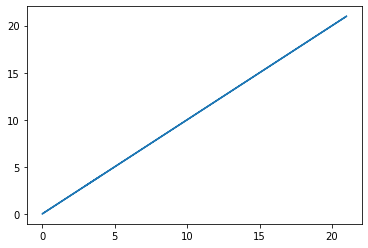

In [16]:
h=plt.plot(Xall['iso'], Xall['isolationd']+Xall['isolatione']+Xall['isolationf'])

We discovered that iso=isolationd+isolatione+isolationf, one variable is redundant!

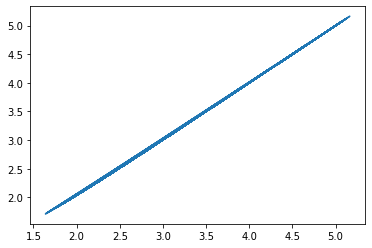

In [17]:
#also knowing some kinematics helps: eta = -log(tan(theta/2))
h=plt.plot(Xall['p0_eta'], -np.log ( np.tan ((np.arctan(Xall['p0_pt']/Xall['p0_p'])  )/2) )) 

In [18]:
# thus, we can do some dimensionality reduction without loss of information
removeVariables=['isolationf','p0_eta', 'p1_eta', 'p2_eta'] 
for v in removeVariables:
    if v in allvars: allvars.remove(v)
    
X= cleantauSample[allvars]

### Now let's start trying analytical models: LDA and QDA

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis

In [21]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [22]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [24]:
lda.score(X_test,y_test)

0.882250945775536

In [27]:
len(y_train)

50752

In [25]:
tauscore=dict()
def binomErr(k,n,z=1):
    # Agresti-Coull binomial error for z sigmas
    bestE=k/n
    modE=(k+z*z/2)/(n+z*z)
    agErr= np.sqrt( modE*(1-modE)/(n+1))
    return bestE,min(bestE, modE-z*agErr),max(bestE, modE+z*agErr)

def seeScore(cls,model):
    predy=model.predict(X_test)
    nok=np.sum( predy == y_test)
    sc_test, sc_test_min, sc_test_max = binomErr(nok,len(predy))
    predy=model.predict(X_train)
    nok=np.sum( predy == y_train)
    sc_train, sc_train_min, sc_train_max = binomErr(nok,len(predy))
    print("score of %s:\ttrain %.4f (%.4f - %.4f)\n \t\ttest  %.4f (%.4f - %.4f)"%(cls,sc_train,sc_train_min, sc_train_max,sc_test, sc_test_min, sc_test_max))
    tauscore[cls]=sc_test

In [28]:
seeScore("lda",lda)
seeScore("qda",qda)

score of lda:	train 0.8871 (0.8857 - 0.8885)
 		test  0.8823 (0.8794 - 0.8851)
score of qda:	train 0.8432 (0.8416 - 0.8448)
 		test  0.8428 (0.8396 - 0.8460)


In [29]:
skl.metrics.confusion_matrix(y_train, lda.predict(X_train))

array([[17510,  3153],
       [ 2576, 27513]])

In [30]:
skl.metrics.confusion_matrix(y_train, qda.predict(X_train))

array([[16109,  4554],
       [ 3404, 26685]])

In [31]:
# cross-validation with K-fold
from sklearn.model_selection import KFold
def myCrossValid(model,nfold=5):
    cv=KFold(n_splits=nfold, shuffle=True)
    scores=[]
    crossPreds=pd.DataFrame(model.predict_proba(X),index=X.index,columns=('probB','probS'))
    for train, test in cv.split(X):
        model.fit(X.iloc[train], y.iloc[train])
        crossPreds.iloc[test]=model.predict_proba(X.iloc[test])
        scores.append(model.score(X.iloc[test],y.iloc[test]))
    print('X-valid score: %.3f  +/- %.3f' % (np.mean(scores), np.std(scores)))
    return scores,crossPreds

In [32]:
lda_scores, ldaProb = myCrossValid(lda)

X-valid score: 0.886  +/- 0.001


In [34]:
ldaProb

probB     probS
0      0.910357  0.089643
1      0.906370  0.093630
2      0.217467  0.782533
3      0.435171  0.564829
4      0.885037  0.114963
5      0.999879  0.000121
6      0.282918  0.717082
7      0.996274  0.003726
8      0.405319  0.594681
9      0.985776  0.014224
10     0.551695  0.448305
11     0.982453  0.017547
12     0.781366  0.218634
13     0.978995  0.021005
14     0.213851  0.786149
15     0.883431  0.116569
16     0.567013  0.432987
17     0.963130  0.036870
18     0.998603  0.001397
19     0.997867  0.002133
20     0.998946  0.001054
21     0.990435  0.009565
22     0.774284  0.225716
23     0.999351  0.000649
24     0.944513  0.055487
25     0.811008  0.188992
26     0.999882  0.000118
27     0.948449  0.051551
28     0.951825  0.048175
29     0.106062  0.893938
...         ...       ...
67521  0.013007  0.986993
67522  0.007480  0.992520
67523  0.000334  0.999666
67524  0.462909  0.537091
67525  0.006175  0.993825
67526  0.029494  0.970506
67527  0.004395  0.995605
67528  0.001963  0.998037
67529  0.062835  0.937165
67531  0.083283  0.916717
67532  0.118116  0.881884
67533  0.000424  0.999576
67534  0.002229  0.997771
67535  0.009455  0.990545
67536  0.009102  0.990898
67537  0.001609  0.998391
67538  0.782663  0.217337
67539  0.015146  0.984854
67540  0.082261  0.917739
67541  0.007939  0.992061
67542  0.000978  0.999022
67544  0.003655  0.996345
67545  0.170121  0.829879
67546  0.003066  0.996934
67547  0.040789  0.959211
67548  0.045936  0.954064
67549  0.049651  0.950349
67550  0.400122  0.599878
67551  0.011247  0.988753
67552  0.123922  0.876078

[63440 rows x 2 columns]

In [33]:
lda_scores

[0.8878467843631778,
 0.8862704918032787,
 0.8861128625472888,
 0.8842213114754098,
 0.8844577553593947]

In [35]:
tauscore["lda"]=np.mean(lda_scores)

In [36]:
sigProb=dict()
sigProb["lda"]= np.array(ldaProb['probS'])

In [37]:
def clsPlot (result, they, mytitle="", logscale=False, nbins=50):
    plt.figure(figsize=(10,7))
    plt.hist(result[they==0], bins=nbins,color='red', label="Background",alpha=0.5 )
    plt.hist(result[they==1], bins=nbins,color='blue', label="signal", alpha=0.5)
    plt.legend()
    plt.title(mytitle)
    if logscale: plt.yscale("log")
    plt.show()

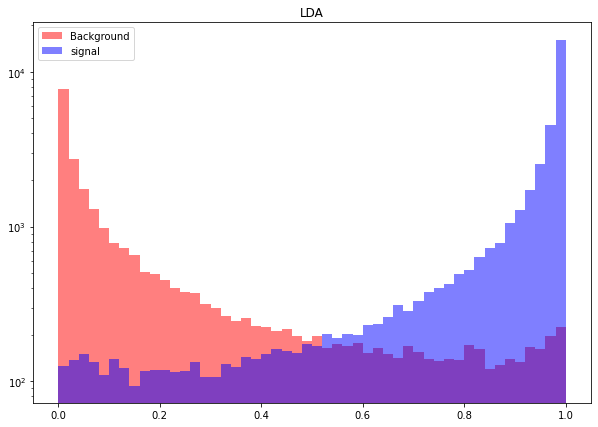

In [39]:
clsPlot(sigProb["lda"], y, "LDA", True)

In [40]:
seeScore("qda",qda)
qda_scores, qdaProb = myCrossValid(qda)

score of qda:	train 0.8432 (0.8416 - 0.8448)
 		test  0.8428 (0.8396 - 0.8460)
X-valid score: 0.837  +/- 0.005


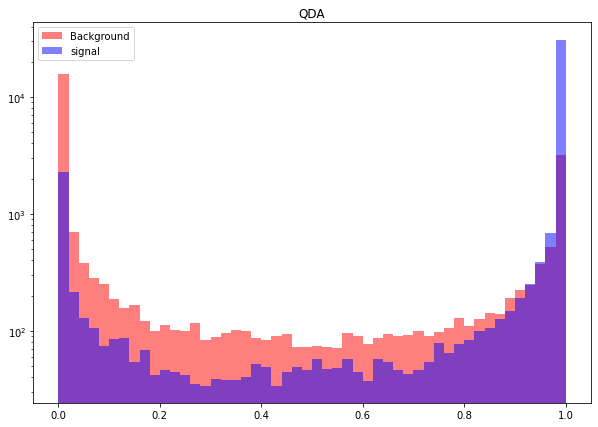

In [41]:
tauscore["qda"]=np.mean(qda_scores)
sigProb["qda"]=np.array(qdaProb['probS'])
clsPlot( sigProb["qda"]  ,y, "QDA",True)

In [42]:
fpr = dict()
tpr = dict()
roc_auc = dict()
def buildROC(cls, soft_score, labels):
    fpr[cls], tpr[cls], _ = skl.metrics.roc_curve(labels, soft_score)
    roc_auc[cls] = skl.metrics.auc(fpr[cls], tpr[cls])

In [43]:
buildROC("lda", sigProb["lda"], y)

In [44]:
buildROC("qda", sigProb["qda"], y)

In [45]:
cols=dict()
cols["lda"]="darkorange"
cols["qda"]="darkgreen"

In [46]:
def plotmyROC():
    plt.figure(figsize=(10,10))
    for cls in cols.keys():
       plt.plot(fpr[cls], tpr[cls], color=cols[cls], 
         lw=2, label='%s (area = %0.3f)' %(cls,roc_auc[cls]))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate',fontsize=24)
    plt.ylabel('True Positive Rate',fontsize=24)
    plt.title('ROC',fontsize=24)
    plt.legend(loc="lower right", fontsize=24)
    plt.show()

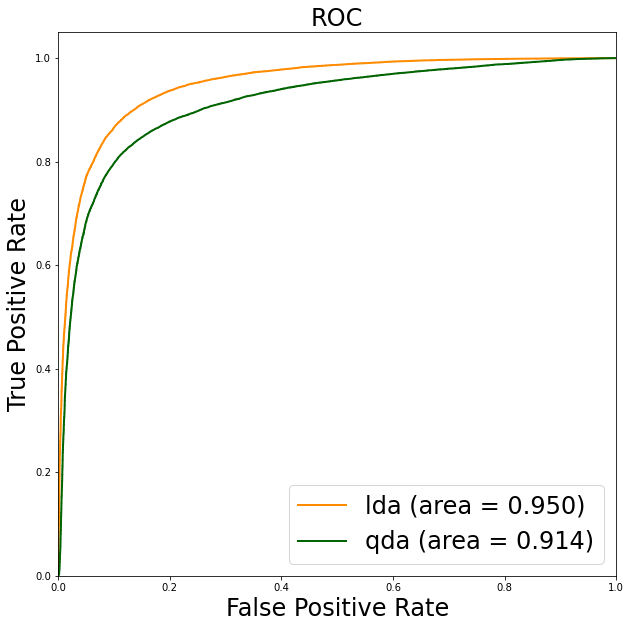

In [47]:
plotmyROC()

### Simple Decision Tree (CART)

In [49]:
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier(max_depth=2)
cart.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

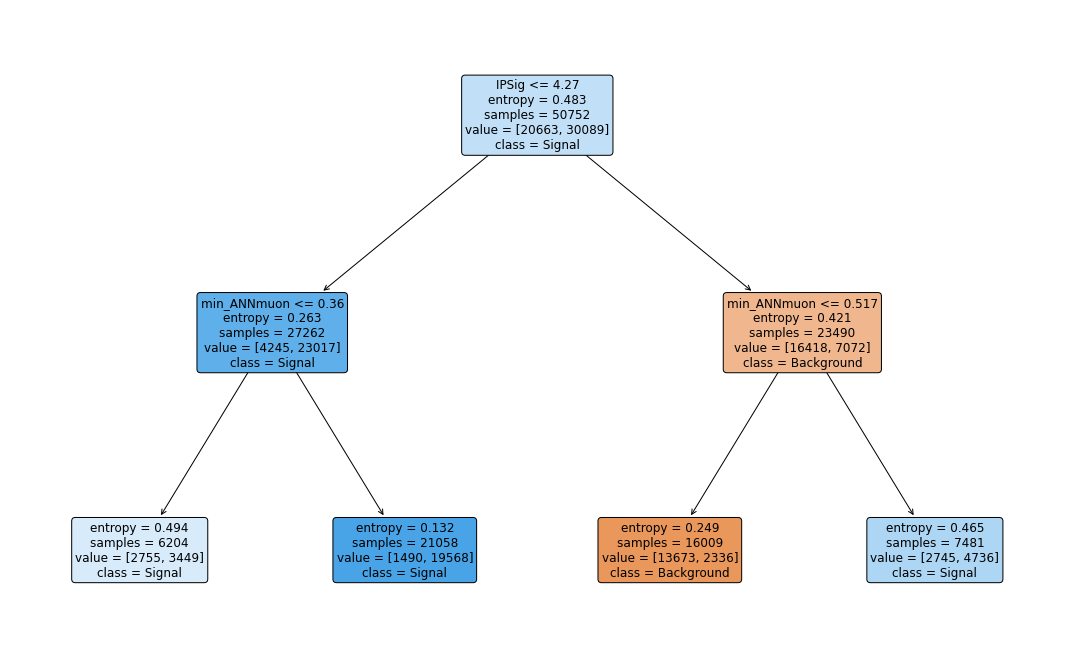

In [50]:
plt.figure(figsize=(19,12))  # set plot size (denoted in inches)
plTree= skl.tree.plot_tree(
cart,
feature_names=allvars,
class_names=["Background","Signal"],
rounded=True,
filled=True,
fontsize=12
)

In [51]:
cart.score(X_train,y_train)

0.8162436948297604

In [52]:
# increase depth
cart = DecisionTreeClassifier(max_depth=12)
cart.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [53]:
seeScore("cart",cart)

score of cart:	train 0.9438 (0.9428 - 0.9449)
 		test  0.8555 (0.8523 - 0.8585)


In [54]:
cart_scores, cartProb = myCrossValid(cart)

X-valid score: 0.855  +/- 0.004


In [55]:
tauscore["cart"]=np.mean(cart_scores)
sigProb["cart"]=np.array(cartProb['probS'])
buildROC("cart", sigProb["cart"], y)

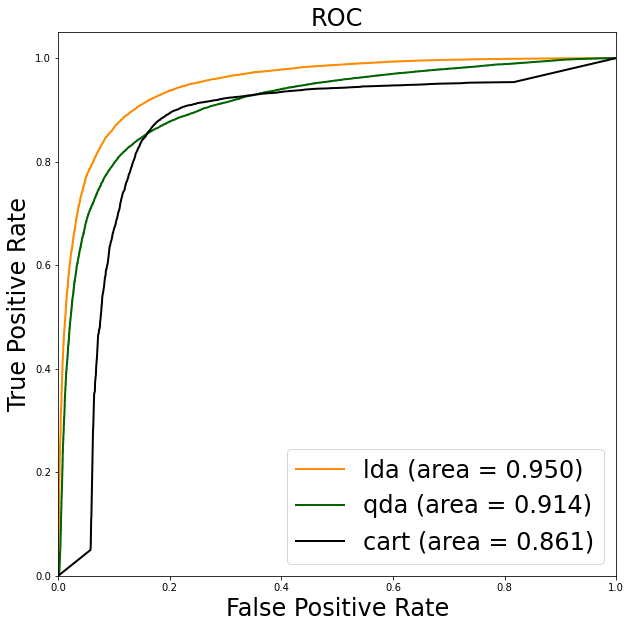

In [56]:
cols["cart"]="black"
plotmyROC()

### AdaBoost classifier

In [57]:
from sklearn.ensemble import AdaBoostClassifier

ada = skl.ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                                      n_estimators=500, learning_rate=0.5)
ada

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [58]:
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [59]:
seeScore("ada",ada)

score of ada:	train 0.9043 (0.9030 - 0.9056)
 		test  0.8945 (0.8917 - 0.8972)


In [60]:
def scoreTable():
    print("Score table:")
    for method,value in sorted(tauscore.items(), key=lambda item: item[1], reverse=True):
      print("%6s %.4f"%(method, value ) )


In [61]:
scoreTable()

Score table:
   ada 0.8945
   lda 0.8858
  cart 0.8555
   qda 0.8369


In [ ]:
#ada_scores, adaProb = myCrossValid(ada)
#tauscore["ada"]=np.mean(ada_scores)
#sigProb["ada"]=np.array(adaProb['probS'])
#ada_scores


X-valid score: 0.898  +/- 0.001

[0.8968316519546028,
 0.8980138713745272,
 0.8984867591424969,
 0.8973833543505675,
 0.8975409836065574]

In [62]:
# there is a little overtraining: use the test sample to draw performances
sigProb["ada"]= np.array([ P[1]  for P in ada.predict_proba(X_test) ])
buildROC("ada", sigProb["ada"] , y_test)

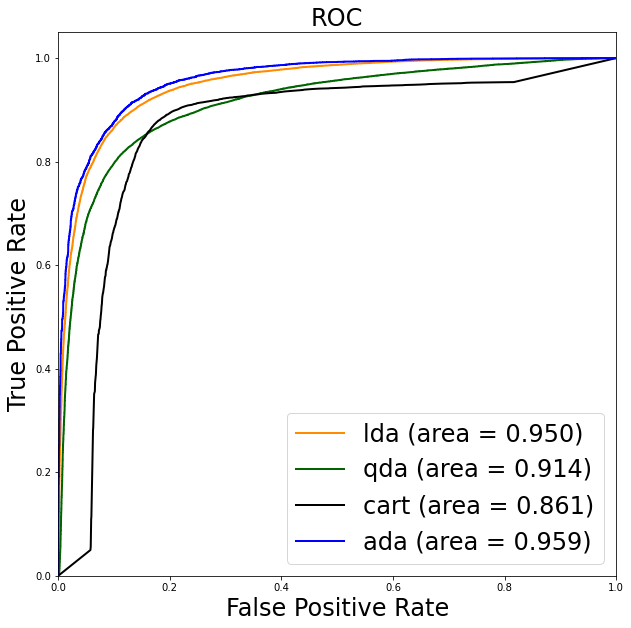

In [63]:
cols["ada"]="blue"
plotmyROC()

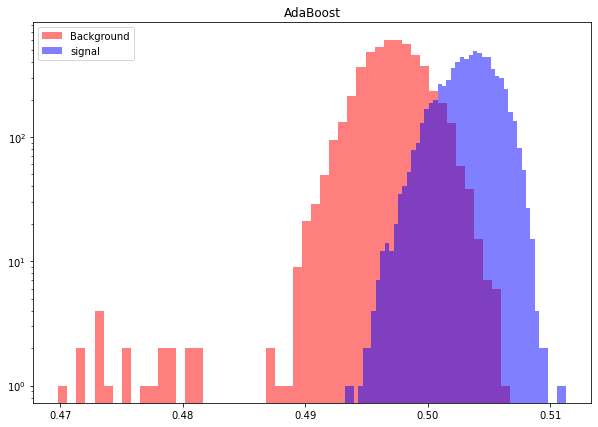

In [65]:
clsPlot(sigProb["ada"],y_test,"AdaBoost",True)

In [66]:
### GradientBoosting classifier

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(n_estimators=200)
gbdt

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [68]:
gbdt.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [70]:
seeScore("gbdt",gbdt)
scoreTable()

score of gbdt:	train 0.9150 (0.9138 - 0.9163)
 		test  0.8960 (0.8933 - 0.8987)
Score table:
  gbdt 0.8960
   ada 0.8945
   lda 0.8858
  cart 0.8555
   qda 0.8369


In [71]:
#gbdt_scores, gbdtProb = myCrossValid(gbdt)

X-valid score: 0.904  +/- 0.002


In [73]:
# there is some overtraining: we build the ROC curve using the test sample
sigProb["gbdt"]= np.array([ P[1]  for P in gbdt.predict_proba(X_test) ])
buildROC("gbdt", sigProb["gbdt"] ,y_test)

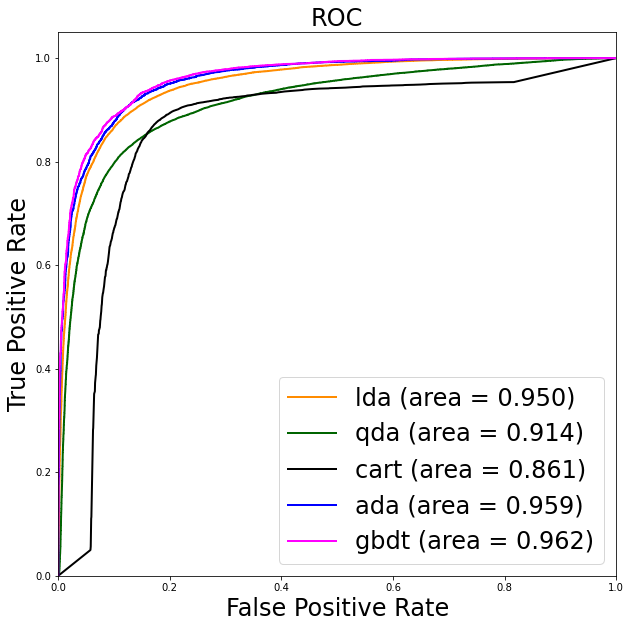

In [74]:
cols["gbdt"]="magenta"
plotmyROC()

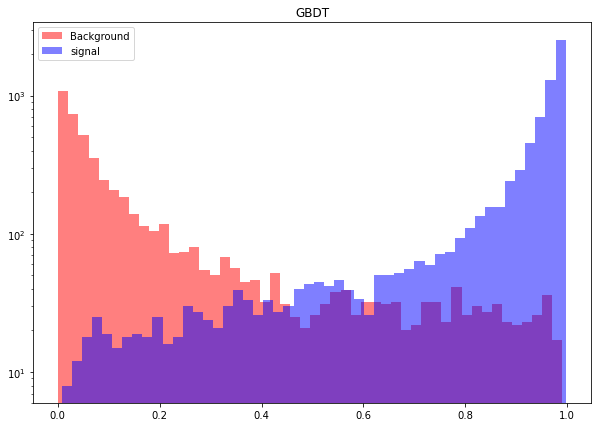

In [76]:
clsPlot(sigProb["gbdt"],y_test,"GBDT",True)

## Now let's implement a deep MLP network with Tensorflow

In [77]:
import tensorflow as tf; print(tf.__version__)


2.3.0


In [79]:
# preprocess columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scl= pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scl= pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [82]:
X_train_scl.describe()

LifeTime          dira  FlightDistance  FlightDistanceError  \
count  5.075200e+04  5.075200e+04    5.075200e+04         5.075200e+04   
mean   1.254426e-16 -7.221413e-14    3.920081e-18        -4.669097e-17   
std    1.000010e+00  1.000010e+00    1.000010e+00         1.000010e+00   
min   -1.247544e+00 -1.741865e+01   -9.299419e-01        -9.919959e-01   
25%   -6.784592e-01  1.287643e-01   -5.859179e-01        -6.192173e-01   
50%   -2.476778e-01  2.634239e-01   -3.004782e-01        -3.190441e-01   
75%    3.854899e-01  2.864308e-01    2.202526e-01         2.245644e-01   
max    2.684611e+01  2.913304e-01    2.846585e+01         1.257893e+01   

                 IP         IPSig    VertexChi2            pt       DOCAone  \
count  5.075200e+04  5.075200e+04  5.075200e+04  5.075200e+04  5.075200e+04   
mean   8.344173e-17 -8.428175e-17 -9.856204e-17  5.285110e-17  9.198191e-17   
std    1.000010e+00  1.000010e+00  1.000010e+00  1.000010e+00  1.000010e+00   
min   -1.068858e+00 -1.237068e+00 -1.336480e+00 -1.550404e+00 -7.094538e-01   
25%   -7.437868e-01 -8.121087e-01 -8.180398e-01 -6.196147e-01 -5.049678e-01   
50%   -3.716565e-01 -3.761702e-01 -2.635428e-01 -2.181839e-01 -2.514418e-01   
75%    5.257300e-01  6.912772e-01  6.482491e-01  3.464472e-01  1.967501e-01   
max    2.510448e+01  4.281523e+00  2.530387e+00  2.247330e+01  1.307081e+02   

            DOCAtwo  ...      p1_IPSig      p2_IPSig         p0_pt  \
count  5.075200e+04  ...  5.075200e+04  5.075200e+04  5.075200e+04   
mean  -4.725098e-17  ...  8.400174e-17 -2.373049e-17  1.393029e-17   
std    1.000010e+00  ...  1.000010e+00  1.000010e+00  1.000010e+00   
min   -9.067219e-01  ... -1.201143e+00 -1.039858e+00 -9.588604e-01   
25%   -6.340574e-01  ... -6.683317e-01 -6.652182e-01 -6.628859e-01   
50%   -2.940965e-01  ... -2.904343e-01 -3.020690e-01 -2.712609e-01   
75%    2.723601e-01  ...  3.372732e-01  3.308228e-01  3.383532e-01   
max    2.059950e+01  ...  1.707023e+01  1.056783e+01  2.676810e+01   

              p1_pt         p2_pt          p0_p          p1_p          p2_p  \
count  5.075200e+04  5.075200e+04  5.075200e+04  5.075200e+04  5.075200e+04   
mean   3.234067e-17 -6.398133e-17  1.991541e-17 -7.350152e-17  3.773078e-17   
std    1.000010e+00  1.000010e+00  1.000010e+00  1.000010e+00  1.000010e+00   
min   -1.237458e+00 -9.861850e-01 -8.638773e-01 -9.910500e-01 -8.480348e-01   
25%   -6.096676e-01 -6.520664e-01 -5.889174e-01 -6.187514e-01 -5.987211e-01   
50%   -2.438512e-01 -2.503041e-01 -3.136798e-01 -3.012518e-01 -3.134062e-01   
75%    2.965115e-01  3.135987e-01  2.024944e-01  2.622427e-01  2.219726e-01   
max    2.312335e+01  1.627664e+01  1.733803e+01  1.881595e+01  1.717780e+01   

            SPDhits   min_ANNmuon  
count  5.075200e+04  5.075200e+04  
mean   7.742161e-17  1.960041e-16  
std    1.000010e+00  1.000010e+00  
min   -2.059558e+00 -1.394036e+00  
25%   -7.721896e-01 -9.381163e-01  
50%   -1.246042e-01 -1.255021e-01  
75%    6.712236e-01  8.744778e-01  
max    2.832442e+00  2.104713e+00  

[8 rows x 43 columns]

In [83]:
my_feature_columns = []
for key in X_train_scl.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))


In [84]:
dnn = tf.estimator.DNNClassifier(hidden_units=[100, 100, 100, 100], n_classes=2,
                                 feature_columns=my_feature_columns,model_dir='savemyDNN')

In [85]:
# input function for training or evaluation
def myinput_fn(features, labels, training=True, batch_size=256):
    # Convert the inputs to a Tensorflow Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()

    return dataset.batch(batch_size)


In [ ]:
# Training can be skipped if already saved in the model_dir 
#dnn.train(
#    input_fn=lambda: myinput_fn(X_train_scl, y_train, training=True),
#    steps=20000)

In [86]:
dnn_result = dnn.evaluate(
    input_fn=lambda: myinput_fn(X_test_scl, y_test, training=False))

W0514 12:20:07.727185 140117076408128 base_layer_v1.py:1822] Layer dnn is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because its dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [87]:
tauscore["dnn"]=dnn_result['accuracy']
scoreTable()

Score table:
   dnn 0.9042
  gbdt 0.8960
   ada 0.8945
   lda 0.8858
  cart 0.8555
   qda 0.8369


In [88]:
def myinput_pred(features, batch_size=256):
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)
dnn_pred = dnn.predict(input_fn=lambda: myinput_pred(X_test_scl))

In [89]:
sigProb["dnn"]= np.array([ P['probabilities'][1] for P in dnn_pred ])

W0514 12:22:40.290893 140117076408128 base_layer_v1.py:1822] Layer dnn is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because its dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



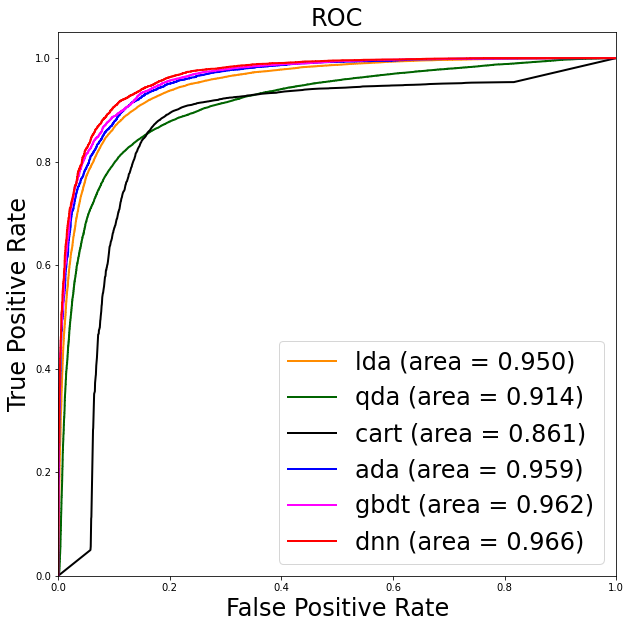

In [90]:
buildROC("dnn", sigProb["dnn"] , y_test)
cols["dnn"]="red"
plotmyROC()

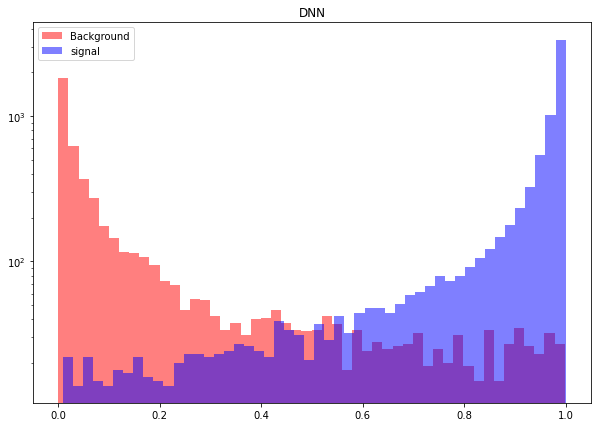

In [91]:
clsPlot(sigProb["dnn"],y_test,"DNN",True)